In [1]:
%matplotlib notebook
import matplotlib.pyplot as plt
import numpy as np
import sympy as sy
import pandas as pd
from sklearn.linear_model import LinearRegression

# Problems

1. Find the Derivative of $f(x) = 3x^2 - 2x + 4$
 1. What is the value of the Derivative at $x = 0$?
 2. Draw and describe a graph of the derivative $f'(x)$

2. Find the derivative of $f(x) = 5e^{0.2x}$.
 1. What is the value of the derivative at $x = 0$?
 2. Plot both $f$ and $f'(x)$ on the same axes.  What is the relationship between them?
 
3. Find the derivative of $e^{-x^2}$ with respect to $x$.  Graph the derivative from $x = -2$ to $x = 2$.  Describe the curve.

- df = $-2x e^{-x^2}$

4. Find the third derivative of $y(t) = \cos(2t)$.  Plot $y$ and $y'$, describe the relationship.
 1. Find and plot the fourth derivative.
 
5. Compute and graph the 4th derivative of $f(x) = \cos{(2x^2)}$ from $x = 0$ to $x = 5$.  What does the graph look like in terms of the original function?

<IPython.core.display.Javascript object>


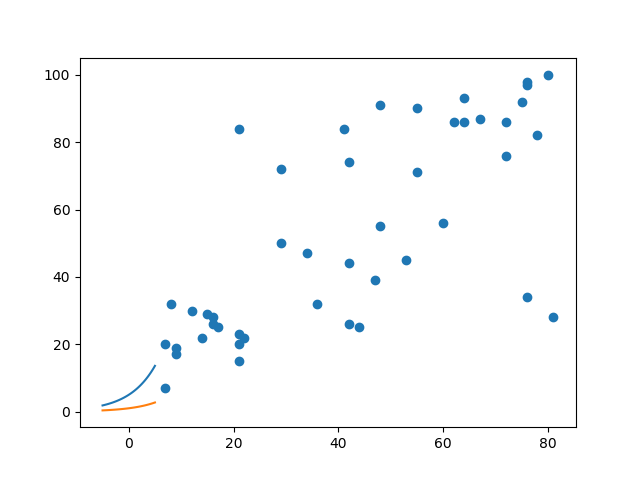

In [17]:
h = 0.000001
def df(x): return (f(x+h) - f(x))/h

x = np.linspace(-5, 5)
def f(x): return 5*np.exp(0.2*x)
plt.plot(x, f(x))
plt.plot(x, df(x))

In [13]:
import sympy as sy

In [14]:
x = sy.Symbol('x')


In [16]:
sy.Derivative(5*sy.exp(0.2*x), x)

Derivative(5*exp(0.2*x), x)

### Regression



In [18]:
import statsmodels.api as sm

/anaconda3/lib/python3.6/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


In [19]:
duncan_prestige = sm.datasets.get_rdataset("Duncan", "car")

In [20]:
duncan_prestige.data[:5]

,type,income,education,prestige
accountant,prof,62,86,82
pilot,prof,72,76,83
architect,prof,75,92,90
author,prof,55,90,76
chemist,prof,64,86,90


In [21]:
data = duncan_prestige.data

<IPython.core.display.Javascript object>


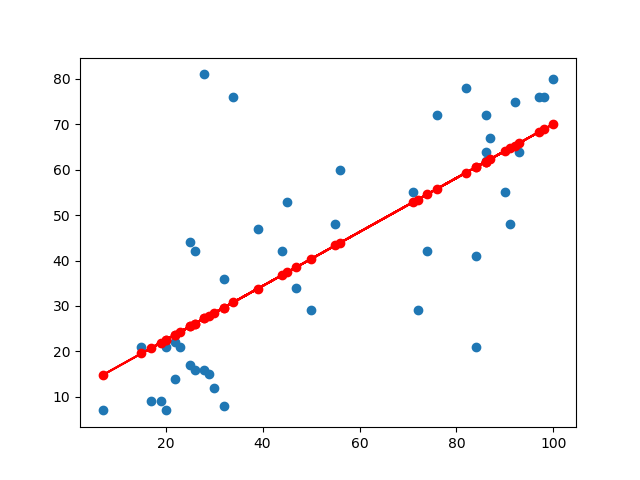

In [24]:
plt.figure()
plt.scatter(data.education, data.income)

In [25]:
X = data.education.values.reshape(-1,1)
y = data.income

In [26]:
lm = LinearRegression()
lm.fit(X, y)

/anaconda3/lib/python3.6/site-packages/scipy/linalg/basic.py:1226: RuntimeWarning: internal gelsd driver lwork query error, required iwork dimension not returned. This is likely the result of LAPACK bug 0038, fixed in LAPACK 3.2.2 (released July 21, 2010). Falling back to 'gelss' driver.
  warnings.warn(mesg, RuntimeWarning)


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [27]:
predictions = lm.predict(X)
plt.plot(X, predictions, '-ro')

In [11]:
lm.score(X, y)

0.5249181546907555

In [12]:
lm.coef_

array([0.88242385])

In [13]:
lm.intercept_

15.611410551816782

### Communities and Crime Data 

There is an interesting dataset that contains information about crime statistics in communities around the country.  Let's investigate this dataset, and use Regression to understand what we can determine about the data using calculus.


https://archive.ics.uci.edu/ml/datasets/Communities+and+Crime

In [28]:
import pandas as pd

In [29]:
df = pd.read_csv('data/criminality.csv')

In [30]:
df.head()

,Êcommunityname,state,countyCode,communityCode,fold,population,householdsize,racepctblack,racePctWhite,racePctAsian,...,burglaries,burglPerPop,larcenies,larcPerPop,autoTheft,autoTheftPerPop,arsons,arsonsPerPop,ViolentCrimesPerPop,nonViolPerPop
0,BerkeleyHeightstownship,NJ,39,5320,1,11980,3.10,1.37,91.78,6.50,...,14,114.85,138,1132.08,16,131.26,2,16.41,41.02,1394.59
1,Marpletownship,PA,45,47616,1,23123,2.82,0.80,95.57,3.44,...,57,242.37,376,1598.78,26,110.55,1,4.25,127.56,1955.95
2,Tigardcity,OR,?,?,1,29344,2.43,0.74,94.33,3.43,...,274,758.14,1797,4972.19,136,376.3,22,60.87,218.59,6167.51
3,Gloversvillecity,NY,35,29443,1,16656,2.40,1.70,97.35,0.50,...,225,1301.78,716,4142.56,47,271.93,?,?,306.64,?
4,Bemidjicity,MN,7,5068,1,11245,2.76,0.53,89.16,1.17,...,91,728.93,1060,8490.87,91,728.93,5,40.05,?,9988.79
